### PROJET BANQUE
----------------------------------------


#### Réalisé par :
--------------------------------------
- HOUNKPATIN CADNEL
- TALL AMADOU
- TOURE ALMAMY MOUSTAPHA



-----------------------------------------------------------------

# M2 SEP 2020 - 2021













In [172]:
# Importation des modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from random import seed
import time
import matplotlib
from IPython.display import display

# Importation des modules Machine Learning dans scikit-learn
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,roc_curve, auc
from sklearn import metrics

## Importation et Pré-traitements

In [114]:
# Importation de la base
bd = pd.read_csv('base_banque.csv',sep=';',encoding="ISO-8859-1")
bd.shape

(43957, 137)

In [115]:
# Utiliser Numero_Client comme index dans notre Base de données
bd.index=bd['Numero_Client']
bd.head()

,Numero_Client,Secteur,Agence,I_Salarie_CR,Groupe_CSP,Age_PP,Nouveau_Client,Sit_Fam,N_Adultes_CC,N_enfants_CC,...,P_IVP,P_VP,P_Ass_Personnes,P_Ass_Sante,P_IARD_PJ,P_IARD_Auto,P_IARD_MRH,N_Prod_Collecte,N_Services,N_Produits
Numero_Client,,,,,,,,,,,,,,,,,,,,,
1,1,1882,421,NS,8,80,N,2,1,0,...,0,0,0,0,0,0,0,2,2,4
2,2,1882,411,NS,5,53,N,4,1,0,...,0,0,0,0,0,0,0,10,2,12
3,3,1880,428,NS,3,57,N,2,2,2,...,0,0,0,0,0,0,0,6,3,10
4,4,1882,412,NS,6,46,N,4,1,0,...,0,0,1,0,0,0,0,3,3,8
5,5,1882,410,NS,6,50,N,4,1,0,...,0,0,0,0,0,0,0,1,2,3


In [116]:
# Proportion des personnes à risque
nb = bd.loc[bd['Filtre_exclusion'] == 1,:].shape[0]/len(bd)
print(nb)

0.10785540414495985


In [117]:
# exclure les clients risqués, instables economiquements, plus de 75 ans et inactifs
bd1=bd.loc[(bd['Filtre_exclusion'] == 0) & 
           (bd['Dispo_Mensuel'] >300) &
           (bd['Age_PP'] <75) &
           (bd['Groupe_CSP'] !=8),:]
bd1.shape

(22685, 137)

In [118]:
bd1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22685 entries, 2 to 43947
Columns: 137 entries, Numero_Client to N_Produits
dtypes: int64(134), object(3)
memory usage: 23.9+ MB


In [119]:
# suppression cértaines colonnes, qui nous semble moins significatives
col_del=['Numero_Client','Secteur','Agence','N_Membres_CC','E_Tiwi','E_LEP','T_P_Auto',
         'Metier_portef','E_DAV','E_CSL','E_LMZ','E_LDD','T_Carte_Paiement',
         'E_CEL','E_PEL','N_DAV','N_CSL','N_Tiwi','N_LMZ','N_LDD','N_GAV',
         'N_Livrets','N_PEL','N_PERP','N_Cpt_Titres','N_PEA','Depart_Resid',
         'N_Cpt_Tit_PEA','T_Carte_Ret','T_Carte','N_IARD_Auto','N_IARD_MRH',
         'N_IARD_PJ','N_Assur_Obseques','N_Dependance','N_IVP','N_VP',
         'N_LEP','N_Connexion_Cael','N_Ope_credit','N_Ope_debit','N_Cel',
         'N_Ope_Tot','N_Paiem_Carte','N_Prelev_Auto','N_Remise_Chq',
         'N_Cheque_Emis','N_Ret_GAB','N_Ret_Guichet','N_Versements']

bd2=bd1.drop(columns = col_del)

In [120]:
# affichage les 5 premières lignes
bd2.head()

,I_Salarie_CR,Groupe_CSP,Age_PP,Nouveau_Client,Sit_Fam,N_Adultes_CC,N_enfants_CC,Filtre_exclusion,N_Contacts_A,I_Non_Vu,...,P_IVP,P_VP,P_Ass_Personnes,P_Ass_Sante,P_IARD_PJ,P_IARD_Auto,P_IARD_MRH,N_Prod_Collecte,N_Services,N_Produits
Numero_Client,,,,,,,,,,,,,,,,,,,,,
2,NS,5,53,N,4,1,0,0,3,0,...,0,0,0,0,0,0,0,10,2,12
3,NS,3,57,N,2,2,2,0,6,0,...,0,0,0,0,0,0,0,6,3,10
6,NS,6,49,N,4,1,0,0,0,1,...,0,0,0,0,0,0,0,2,2,4
7,NS,5,28,N,1,1,0,0,2,0,...,1,0,1,0,1,1,0,4,7,11
10,NS,6,49,N,4,1,0,0,1,0,...,0,0,0,0,0,0,0,4,1,6


In [121]:
# les variables qualitatives à recoder
cols=['Groupe_CSP','Nouveau_Client','I_Salarie_CR','Sit_Fam','Filtre_exclusion',
      'I_Non_Vu','P_DAV','P_CSL','P_Tiwi','P_LMZ','P_LDD','Ut_Internet','P_DAV',
      'P_CSL','P_Tiwi','P_LMZ','P_LDD','P_LEP','P_Livrets','P_Cel','P_PEL',
      'P_PERP','P_Oblig','P_OPCVM','P_Actions','P_Collecte','P_Epargne',
      'P_Cpt_Tit_PEA','P_Cpt_Titres','P_PEA','P_P_Auto','P_P_Etudiant',
      'P_Conso','P_P_Familiaux','P_P_Habitat','P_C_Moz_Ret','P_C_Moz_Paiem',
      'P_C_Autre_Carte','P_C_Maestro','P_C_Paiem_DI','P_C_Paiem_DD',
      'P_C_Gold_Visa_DD','P_Carte_Ret','P_Carte_Paiement','P_Carte',
      'P_Comptes_Services','P_Dependance','P_GAV','P_IVP','P_VP',
      'P_Ass_Personnes','P_Ass_Sante','P_IARD_PJ','P_IARD_Auto','P_IARD_MRH',
      'N_Prod_Collecte']

In [122]:
# recodage des variables
labelencoder=LabelEncoder()


for col in cols:
    if (col=="I_Salarie_CR")|(col=="Nouveau_Client"):
        bd2[col] = labelencoder.fit_transform(bd1[col])
        bd2[col] = labelencoder.fit_transform(bd1[col])
    
    bd2[col] = bd2[col].astype('category')
    
bd2.head()

,I_Salarie_CR,Groupe_CSP,Age_PP,Nouveau_Client,Sit_Fam,N_Adultes_CC,N_enfants_CC,Filtre_exclusion,N_Contacts_A,I_Non_Vu,...,P_IVP,P_VP,P_Ass_Personnes,P_Ass_Sante,P_IARD_PJ,P_IARD_Auto,P_IARD_MRH,N_Prod_Collecte,N_Services,N_Produits
Numero_Client,,,,,,,,,,,,,,,,,,,,,
2,1,5,53,0,4,1,0,0,3,0,...,0,0,0,0,0,0,0,10,2,12
3,1,3,57,0,2,2,2,0,6,0,...,0,0,0,0,0,0,0,6,3,10
6,1,6,49,0,4,1,0,0,0,1,...,0,0,0,0,0,0,0,2,2,4
7,1,5,28,0,1,1,0,0,2,0,...,1,0,1,0,1,1,0,4,7,11
10,1,6,49,0,4,1,0,0,1,0,...,0,0,0,0,0,0,0,4,1,6


In [124]:
# Vérification des modalitées des variables(I_Salarie_CR,Nouveau_Client)
print(bd2['I_Salarie_CR'].unique())
print(bd2['Nouveau_Client'].unique())

[1, 2, 0]
Categories (3, int64): [1, 2, 0]
[0, 1]
Categories (2, int64): [0, 1]


In [127]:
bd2.shape
bd2.info()
bd2.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22685 entries, 2 to 43947
Data columns (total 87 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   I_Salarie_CR        22685 non-null  category
 1   Groupe_CSP          22685 non-null  category
 2   Age_PP              22685 non-null  int64   
 3   Nouveau_Client      22685 non-null  category
 4   Sit_Fam             22685 non-null  category
 5   N_Adultes_CC        22685 non-null  int64   
 6   N_enfants_CC        22685 non-null  int64   
 7   Filtre_exclusion    22685 non-null  category
 8   N_Contacts_A        22685 non-null  int64   
 9   I_Non_Vu            22685 non-null  category
 10  NIR_T               22685 non-null  int64   
 11  CA_dom_A            22685 non-null  int64   
 12  Cap_Accum           22685 non-null  int64   
 13  Dispo_Mensuel       22685 non-null  int64   
 14  Flux_Corr           22685 non-null  int64   
 15  SM_DAV_A            22685 non-null  

,Age_PP,N_Adultes_CC,N_enfants_CC,N_Contacts_A,NIR_T,CA_dom_A,Cap_Accum,Dispo_Mensuel,Flux_Corr,SM_DAV_A,...,T_IVP_VP,T_Ass_Personnes,T_Ass_Sante,T_Comptes_Services,Mt_Paiem_Carte,Mt_Prelev_Auto,N_Vir_Recus,T_Vir_Emis,N_Services,N_Produits
count,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,2.268500e+04,22685.000000,22685.000000,2.268500e+04,22685.000000,...,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000
mean,44.297245,1.550320,0.498479,2.223011,66.839057,6.091359e+04,881.709147,4011.684153,4.819653e+04,3666.260084,...,0.389112,0.699581,0.049416,0.848534,8379.695085,8978.227816,54.948997,9.246330,3.626449,10.496892
std,16.052933,0.500212,0.882119,2.285854,10.791355,1.132064e+05,2357.455999,8515.086203,8.371749e+04,7564.034090,...,0.693202,1.093730,0.233200,0.558497,8763.050440,17750.995583,40.704910,16.155919,2.620357,6.098068
min,0.000000,0.000000,0.000000,0.000000,12.000000,3.658000e+03,0.000000,302.000000,2.625000e+03,-77308.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,33.000000,1.000000,0.000000,1.000000,61.000000,2.184100e+04,46.000000,1270.000000,1.947300e+04,591.000000,...,0.000000,0.000000,0.000000,1.000000,1833.000000,2612.000000,26.000000,0.000000,2.000000,6.000000
50%,45.000000,2.000000,0.000000,2.000000,69.000000,3.639500e+04,209.000000,2157.000000,3.001800e+04,1561.000000,...,0.000000,0.000000,0.000000,1.000000,6213.000000,5915.000000,47.000000,3.000000,3.000000,9.000000
75%,57.000000,2.000000,1.000000,3.000000,75.000000,6.333100e+04,756.000000,3903.000000,4.905100e+04,3811.000000,...,1.000000,1.000000,0.000000,1.000000,12188.000000,10852.000000,76.000000,11.000000,5.000000,14.000000
max,74.000000,3.000000,6.000000,61.000000,82.000000,8.566293e+06,109138.000000,647248.000000,6.118780e+06,283535.000000,...,6.000000,12.000000,3.000000,4.000000,184212.000000,863470.000000,1262.000000,500.000000,28.000000,55.000000


In [128]:
# valeurs manquantes
a = bd2.isnull().sum()
a[a>0]

# pas de valeurs manquantes

Series([], dtype: int64)

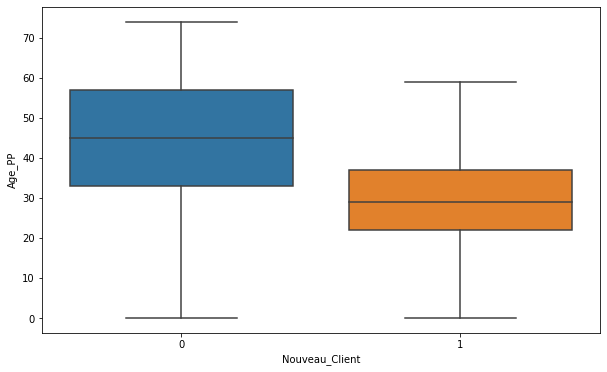

In [129]:
plt.figure(figsize=(10,6)) # pour ajuster la taille d'un graphique
sns.boxplot(x='Nouveau_Client', y='Age_PP', data=bd2, showfliers=False)

In [131]:
value=['O','N']
for i in value:
    print("la moyenne d'âge des clients pour ", i , "   :", bd2.loc[bd1['Nouveau_Client']== i,:]['Age_PP'].mean())


la moyenne d'âge des clients pour  O    : 28.254752851711025
la moyenne d'âge des clients pour  N    : 44.48541610917849


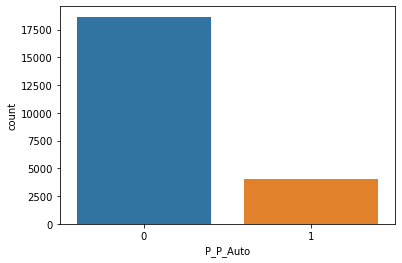

0    18646
1     4039
Name: P_P_Auto, dtype: int64

In [133]:
sns.countplot(x='P_P_Auto', data=bd2)
plt.show()
bd2['P_P_Auto'].value_counts()


## Sélection des variables

In [157]:
# subdivision de la base: la variable cible et les varaibles eplicatives
Y=bd2["P_P_Auto"]
X=bd2.drop(columns = ["P_P_Auto"])

In [135]:
# Nous avons aplliqué la méthode SelectKBest afin de réduire les varaibles moins significatves pour notre étude.
# Sélection des variables explicatives 
f_classif(X,Y)
selector = SelectKBest(f_classif, k=30) # On sélectionne les 30 variables les plus significatives
selector.fit_transform(X,Y)
selector.get_support()
np.array(X.columns)[selector.get_support()]

C:\Users\Cadnel HOUNKPATIN\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 7 41] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\Cadnel HOUNKPATIN\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Cadnel HOUNKPATIN\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 7 41] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\Cadnel HOUNKPATIN\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array(['I_Salarie_CR', 'Age_PP', 'N_enfants_CC', 'N_Contacts_A',
       'I_Non_Vu', 'NIR_T', 'SM_DAV_A', 'T_Conso', 'T_Contrats_IARD',
       'T_IVP_VP', 'T_Ass_Personnes', 'T_Comptes_Services',
       'Mt_Paiem_Carte', 'N_Vir_Recus', 'T_Vir_Emis', 'Ut_Internet',
       'P_Tiwi', 'P_LMZ', 'P_Conso', 'P_P_Familiaux', 'P_C_Moz_Ret',
       'P_Carte_Ret', 'P_Comptes_Services', 'P_GAV', 'P_IVP',
       'P_Ass_Personnes', 'P_IARD_PJ', 'P_IARD_Auto', 'N_Services',
       'N_Produits'], dtype=object)

In [158]:
# les varibles rétenues pour la suite de notre étude 
nb_var_garder=np.array(X.columns)[selector.get_support()]

In [161]:
# les variables explicatives retenues  
X_rete=bd2[nb_var_garder]
X_rete.head()

,I_Salarie_CR,Age_PP,N_enfants_CC,N_Contacts_A,I_Non_Vu,NIR_T,SM_DAV_A,T_Conso,T_Contrats_IARD,T_IVP_VP,...,P_C_Moz_Ret,P_Carte_Ret,P_Comptes_Services,P_GAV,P_IVP,P_Ass_Personnes,P_IARD_PJ,P_IARD_Auto,N_Services,N_Produits
Numero_Client,,,,,,,,,,,,,,,,,,,,,
2,1,53,0,3,0,75,14363,0,0,0,...,0,0,1,0,0,0,0,0,2,12
3,1,57,2,6,0,77,723,5000,0,0,...,1,1,1,0,0,0,0,0,3,10
6,1,49,0,0,1,54,278,0,0,0,...,0,0,1,0,0,0,0,0,2,4
7,1,28,0,2,0,62,623,0,3,1,...,0,0,1,1,1,1,1,1,7,11
10,1,49,0,1,0,55,9251,0,0,0,...,0,0,0,0,0,0,0,0,1,6


In [162]:
# Matrice de Corrélation
X_rete.corr()

# On remarque que les variables explicatives sont moins correlées entre elles

,Age_PP,N_enfants_CC,N_Contacts_A,NIR_T,SM_DAV_A,T_Conso,T_Contrats_IARD,T_IVP_VP,T_Ass_Personnes,T_Comptes_Services,Mt_Paiem_Carte,N_Vir_Recus,T_Vir_Emis,N_Services,N_Produits
Age_PP,1.000000,-0.203865,-0.012626,-0.136570,0.204343,-0.076621,-0.080143,-0.271425,-0.115041,-0.238097,-0.058405,0.053279,-0.188494,-0.231747,-0.025091
N_enfants_CC,-0.203865,1.000000,0.136144,0.266918,-0.053753,0.095900,0.084618,0.238911,0.133016,0.124001,0.225317,0.316633,0.162944,0.320619,0.402436
N_Contacts_A,-0.012626,0.136144,1.000000,0.367936,0.084240,0.115566,0.221515,0.151165,0.225556,0.113686,0.159189,0.195983,0.207097,0.317556,0.496960
NIR_T,-0.136570,0.266918,0.367936,1.000000,-0.002309,0.206156,0.193569,0.211437,0.213704,0.335442,0.504140,0.461772,0.308898,0.430221,0.543794
SM_DAV_A,0.204343,-0.053753,0.084240,-0.002309,1.000000,-0.043852,-0.057603,-0.125161,-0.102465,-0.144535,0.090060,0.037976,-0.049746,-0.127179,0.065894
T_Conso,-0.076621,0.095900,0.115566,0.206156,-0.043852,1.000000,0.151499,0.166260,0.174950,0.118634,0.123621,0.107420,0.111173,0.214404,0.192480
T_Contrats_IARD,-0.080143,0.084618,0.221515,0.193569,-0.057603,0.151499,1.000000,0.201018,0.289268,0.156407,0.060056,0.089886,0.086480,0.611232,0.373292
T_IVP_VP,-0.271425,0.238911,0.151165,0.211437,-0.125161,0.166260,0.201018,1.000000,0.760812,0.225115,0.066538,0.105099,0.104551,0.577185,0.388613
T_Ass_Personnes,-0.115041,0.133016,0.225556,0.213704,-0.102465,0.174950,0.289268,0.760812,1.000000,0.230562,0.033954,0.084659,0.057432,0.695819,0.474535
T_Comptes_Services,-0.238097,0.124001,0.113686,0.335442,-0.144535,0.118634,0.156407,0.225115,0.230562,1.000000,0.181825,0.222766,0.249051,0.540332,0.329765


# Modélisation

In [163]:
# subdivision de la base apprentissatge(70% des observations) et test (30%)
X_train, X_test, y_train, y_test = train_test_split(X_rete, Y, test_size = 0.3, random_state=1, stratify=Y)


In [164]:
# vérification de la répartition sur chaque modalitée
print(y_train.groupby(y_train).count())

print(y_test.groupby(y_test).count())

P_P_Auto
0    13052
1     2827
Name: P_P_Auto, dtype: int64
P_P_Auto
0    5594
1    1212
Name: P_P_Auto, dtype: int64


In [165]:
# dictionnaires des méthodes utilisés
dict_classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=150, random_state=1),
    "AdaBoost": AdaBoostClassifier(random_state=1),
    "Regression log " : LogisticRegression(random_state=1)
}

# Permet de calculer les taux de précision(apprentissage et test) et aussi le temps d'apprentissage pour chaque modèle
def batch_classify(X_train, Y_train, X_test, Y_test, no_classifiers = 5, verbose = True):
    dict_models = {}
    for classifier_name, classifier in list(dict_classifiers.items())[:no_classifiers]:
        seed(35)
        t_start = time.time()
        
        classifier.fit(X_train, Y_train)
        t_end = time.time()
        
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        test_score = classifier.score(X_test, Y_test)
        
        dict_models[classifier_name] = {'model': classifier, 'train_score': train_score, 'test_score': test_score, 'train_time': t_diff}
        
    return dict_models

# l'affichage dans un tableau des différents résultats des modèles(taux de précision et le temps d'apprentissage)
def display_dict_models(dict_models, sort_by='test_score'):
    cls = [key for key in dict_models.keys()]
    test_s = [dict_models[key]['test_score'] for key in cls]
    training_s = [dict_models[key]['train_score'] for key in cls]
    training_t = [dict_models[key]['train_time'] for key in cls]
    
    df_ = pd.DataFrame(data=np.zeros(shape=(len(cls),4)), columns = ['classifier', 'train_score', 'test_score', 'train_time'])
    for ii in range(0,len(cls)):
        df_.loc[ii, 'classifier'] = cls[ii]
        df_.loc[ii, 'train_score'] = training_s[ii]
        df_.loc[ii, 'test_score'] = test_s[ii]
        df_.loc[ii, 'train_time'] = training_t[ii]
    
    display(df_.sort_values(by=sort_by, ascending=False))


In [167]:
# apprentissage de nos modèles 
dict_models = batch_classify(X_train, y_train, X_test, y_test, no_classifiers = 4)
display_dict_models(dict_models)

C:\Users\Cadnel HOUNKPATIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,classifier,train_score,test_score,train_time
0,Random Forest,1.000000,0.892154,2.060831
1,AdaBoost,0.895522,0.888334,2.078004
2,Regression log,0.851250,0.852042,0.196998


La régression logistique est le meilleur modèle en termes d'efficacité et de temps d'apprentissage.

In [170]:
# apprentissage du modèle choisi
lr=LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

C:\Users\Cadnel HOUNKPATIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [173]:
# calcul de la matrice de confusion sur la base test
y_pred = lr.predict(X_test)

mc = pd.crosstab(y_test,y_pred)

print(mc)

#taux de succès
acc = metrics.accuracy_score(y_test,y_pred)
print("\ntaux de succès",acc) 

#taux d'erreur
err = 1.0 - acc
print("taux d'erreur",err)


col_0        0    1
P_P_Auto           
0         5381  213
1          794  418

taux de succès 0.8520423156038789
taux d'erreur 0.14795768439612111


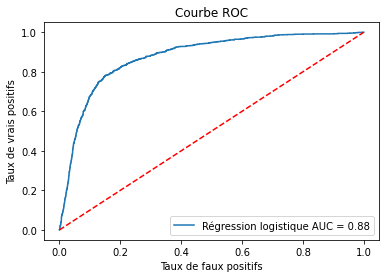

In [174]:
# Courbe ROC
modeles = lr

plt.title('Courbe ROC')


probs = lr.predict_proba(X_test) 
preds = probs[:,1] 
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

tpr = np.insert(tpr, 0, 0)
fpr = np.insert(fpr, 0, 0)

plt.plot(fpr, tpr, label = 'Régression logistique' +' AUC = %0.2f' % roc_auc)

#plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('Taux de vrais positifs')
plt.xlabel('Taux de faux positifs')
plt.legend()
plt.show()

In [175]:
#calcul des probas d'affectation sur la base initiale
probas = lr.predict_proba(X_rete)
#score de 'P_P_Auto'=0
score = probas[:,0] 
score

array([0.9717945 , 0.86658047, 0.91439511, ..., 0.89994963, 0.90130217,
       0.94176589])

In [178]:
# la créatin de la datafrme(identifiant du client et score)
df_score=pd.DataFrame(score,columns=['score'])


df_score['id_client']=X_rete.index  # récuperation des indentifiants des clients 
df_score

,score,id_client
0,0.971794,2
1,0.866580,3
2,0.914395,6
3,0.798207,7
4,0.945691,10
...,...,...
22680,0.613689,43933
22681,0.777014,43937
22682,0.899950,43942
22683,0.901302,43944


In [179]:
# trier afin de récuperer les 5000 premiers clients 
df=df_score.sort_values(by=['score'],ascending=False)
df

,score,id_client
3342,1.000000e+00,7780
7737,1.000000e+00,17477
17668,9.999999e-01,31557
6699,9.999997e-01,15452
5306,9.999984e-01,12368
...,...,...
7655,4.747103e-09,17331
17947,0.000000e+00,32104
15009,0.000000e+00,27837
21267,0.000000e+00,40103


In [180]:
df.head(5000)

,score,id_client
3342,1.000000,7780
7737,1.000000,17477
17668,1.000000,31557
6699,1.000000,15452
5306,0.999998,12368
...,...,...
14860,0.939016,27613
16056,0.939011,29265
1258,0.939006,2942
11276,0.939004,22534
